# Lecture 35: Variable Neighbourhood Search

---

## Overview

Unlike any of the previously discussed algorithms, the Variable Neighbourhood Search algorithm concomitantly explores multiple neighbourhoods in the solution landscape to comprehensively search for high-quality solutions. Specifically, the algorithm begins with an initial solution – $s_o$, setting it as the current solution – $s$, as well as the best solution – $s^*$. Hereafter, the algorithm iterates until it reaches a threshold level of solution quality or computation effort. In each such iteration, the algorithm sequentially generates a new solution from a given set of neighbourhoods – $N$. In each such sequence, the Variable Neighbourhood Search algorithm performs a series of transformations on the current solution, defined by the neighbourhood $N_j;j≤||N||$, to generate a new solution – $s'$. This new solution undergoes local search – $\text{LS}$, in the same neighbourhood – $N_j$, given search parameters – $χ$. If the resulting new solution is better than the current solution, then the algorithm updates the current solution and consequently restarts the neighbourhood search after updating the best solution, if required. Alternatively, if the resulting new solution is not better than the current solution, then the algorithm simply moves to the next neighbourhood in the sequence. Finally, upon reaching a threshold level of solution quality or computational effort, the algorithm converges, returning the best solution.

Much like the Iterative Local Search algorithm, the Variable Neighbourhood Search algorithm ensures solution diversification (exploration) through multiple neighbourhood transformations that enable the search to escape the local optima, and solution exploitation (intensification) through the local search heuristics that refine solutions to reach local optima. To ensure effective exploration and exploitation of the solution landscape, the algorithm necessitates deliberate development contextual to the problem at hand with suitable neighbourhood structures, appropriate local search procedure, and sophisticated parameter tuning. And while this makes for a difficult implementation, as is the case with the Iterative Local Search algorithm, yet due to the capability of the Variable Neighbourhood Search algorithm to explore multiple neighbourhoods, it has found extensive use in the literature to address the routing-based problems such as the dial-a-ride problem and vehicle routing problem.


---

## Pseudo Code

1. **Procedure** $\text{VNS}(s_o, (LS, N, \chi))$
2. $s ← s_o$ &emsp;<small>// initialise current solution $s$ as the initial solution $s_o$</small>
3. $s^* ← s$ &emsp;<small>// initialise best solution $s^*$ as the current solution</small>
4. $i ← ||N||$ &emsp;<small>// set $i$ as the size of the neighbourhood set $N$</small>
5. $j ← 1$ &emsp;<small>// initialise neighbourhood index $j$ to 1</small>
6. **while** $!\text{converged}$ **do** &emsp;<small>// repeat until converged</small>
7. &emsp;**while** $j \leq i$ &emsp;<small>// repeat until all neighbourhoods are explored</small>
8. &emsp;&emsp;$s' {R \atop ←} N_j(s)$ &emsp;<small>// generate new random solution from neighborhood $N_j$ of the current solution</small>
9. &emsp;&emsp;$s' ← \text{LS}(s', (N_j, \chi))$ &emsp;<small>// perform local search $\text{LS}$ on the new solution given search parameters $\chi$</small>
10. &emsp;&emsp;**if** $f(s') < f(s)$ **then** &emsp;<small>// if the new solution is better than the current solution</small>
11. &emsp;&emsp;&emsp;$s ← s'$ &emsp;<small>// update the current solution to the new solution</small>
12. &emsp;&emsp;&emsp;$j ← 1$ &emsp;<small>// reset the neighbourhood index to one</small>
13. &emsp;&emsp;**else**
14. &emsp;&emsp;&emsp;$j ← j + 1$ &emsp;<small>// move neighbourhood index to the next index</small>
15. &emsp;&emsp;**end if**
16. &emsp;**if** $f(s) < f(s^*)$ **then** &emsp;<small>// if the current solution is better than the best solution</small>
17. &emsp;&emsp;$s^* ← s$ &emsp;<small>// update the best solution to the current solution</small>
18. &emsp;**end if**
19. &emsp;**end while**
20. **end while**
21. **return** $s^*$ &emsp;<small>// return the best solution</small>

---

## Implementation

In [6]:
import copy
import random
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def vns(s_o, ls, N, X, n=100, t=1e-5):
    """
    Variable Neighbourhood Search (VNS) Algorithm

    Parameters:
    - s_o: Initial solution
    - ls: Local search function
    - N: List of neighborhood functions
    - X: Parameters for local search
    - n: Maximum number of iterations
    - t: Convergence threshold

    Returns:
    - Best solution found in each iteration
    """
    s   = s_o     # Current solution
    s_b = s       # Best solution found
    S   = [s_b]   # Track best solutions over iterations
    
    i = 1
    k = len(N)
    e = float('inf')
    converged = False
    while not converged:
        j = 0                             # Neighbourhood index (0-based for Python)
        while j < k:
            N_j = N[j]
            s_n = N_j(s)                  # Generate neighbor from N_j
            s_n = ls(s_n, N_j, X)         # Apply local search on neighbor

            if f(s_n) < f(s):             # If improvement, accept and reset j
                s = s_n
                j = 0
            else:
                j += 1                    # Else, move to next neighborhood

            if f(s) < f(s_b):             # Update best solution if improved
                s_b = s

        S.append(s_b)                     # Store best solution at each iteration
        
        i += 1
        if i >= n or e <= t:              # Convergence condition
          converged = True

    return S


---

## Case Study

Here, we have a benchmarked Vehicle Routing Problem instance (E-n51-k5) defined on a directed graph $G=(d,C)$, where $d$ represents depot node, and node set $C$ represents customer nodes. Here, each customer node $c \in C$ has a demand $q_c$ that must be fulfilled from the depot via delivery fleet $V$, wherein each vehicle $v$ has a capacity $q_v$. Given traversal length $d_{ij}$ for arc $(i,j) \in A$, the objective of a Vehicle Routing Problem is to develop routes from the depot node using select vehicles such that every customer node is visited exactly once while minimising the total distance traveled and satisfying all vehicle capacity constraints.

In [1]:
D = [(0, 30, 40, 0)]
C = [
      (1, 37, 52, 7), 
      (2, 49, 49, 30), 
      (3, 52, 64, 16), 
      (4, 20, 26, 9), 
      (5, 40, 30, 21), 
      (6, 21, 47, 15), 
      (7, 17, 63, 19), 
      (8, 31, 62, 23), 
      (9, 52, 33, 11), 
      (10, 51, 21, 5), 
      (11, 42, 41, 19), 
      (12, 31, 32, 29), 
      (13, 5, 25, 23), 
      (14, 12, 42, 21), 
      (15, 36, 16, 10), 
      (16, 52, 41, 15), 
      (17, 27, 23, 3), 
      (18, 17, 33, 41), 
      (19, 13, 13, 9), 
      (20, 57, 58, 28), 
      (21, 62, 42, 8), 
      (22, 42, 57, 8), 
      (23, 16, 57, 16), 
      (24, 8, 52, 10), 
      (25, 7, 38, 28), 
      (26, 27, 68, 7), 
      (27, 30, 48, 15), 
      (28, 43, 67, 14), 
      (29, 58, 48, 6), 
      (30, 58, 27, 19), 
      (31, 37, 69, 11), 
      (32, 38, 46, 12), 
      (33, 46, 10, 23), 
      (34, 61, 33, 26), 
      (35, 62, 63, 17), 
      (36, 63, 69, 6), 
      (37, 32, 22, 9), 
      (38, 45, 35, 15), 
      (39, 59, 15, 14), 
      (40, 5, 6, 7), 
      (41, 10, 17, 27), 
      (42, 21, 10, 13), 
      (43, 5, 64, 11), 
      (44, 30, 15, 16), 
      (45, 39, 10, 10), 
      (46, 32, 39, 5), 
      (47, 25, 32, 25), 
      (48, 25, 55, 17), 
      (49, 48, 28, 18), 
      (50, 56, 37, 10)
]
V = [
      (1, 160),
      (2, 160),
      (3, 160),
      (4, 160),
      (5, 160)
]

In [3]:
# Compute total cost
def f(s):
    z = 0
    d = D[0]

    for k, R in enumerate(s):
        if not R:
            continue
        
        # Distance
        n  = C[R[0]]
        z += np.sqrt((d[1] - n[1])**2 + (d[2] - n[2])**2)
        for i in range(len(R)-1):
            m  = C[R[i+1]]
            z += np.sqrt((n[1] - m[1])**2 + (n[2] - m[2])**2)
            n  = m
        z += np.sqrt((n[1] - d[1])**2 + (n[2] - d[2])**2)

        # Penalty
        v   = V[k]
        q_v = v[1]
        w   = sum(C[i][3] for i in s[k])
        p   = max(0, w-q_v)
        z  +=  100 * p

    return z

# Move  
def N1(s):
    s_n = copy.deepcopy(s)

    i, j = random.sample(range(len(V)), 2)
    k = random.randint(0, len(s_n[i])-1)
    
    c = s_n[i][k]
    del s_n[i][k]

    k = random.randint(0, len(s_n[j]))
    s_n[j].insert(k, c)

    return s_n

# Swap
def N2(s):
    s_n = copy.deepcopy(s)

    i, j = random.sample(range(len(V)), 2)
    
    if not s_n[i]:
        return s_n
    if not s_n[j]:
        return s_n
    
    a = random.randint(0, len(s_n[i])-1)
    b = random.randint(0, len(s_n[j])-1)

    s_n[i][a], s_n[j][b] = s_n[j][b], s_n[i][a]

    return s_n

# 2-opt
def N3(s):
    s_n = copy.deepcopy(s)
    
    i = random.choice([k for k, R in enumerate(s_n) if len(R) >= 4])
    
    R = s_n[i]
    a, b = sorted(random.sample(range(len(R)), 2))
    R[a:b+1] = reversed(R[a:b+1])
    s_n[i] = R
    
    return s_n

# Local Search
def ls(s, N, X):
    for _ in range(X.get("n", 50)):
        s_n = N(s)
        if f(s_n) < f(s):
            s = s_n
    return s

# Visualise
def viz(s):
    d = D[0]

    plt.scatter(d[1], d[2], c='indianred', marker='s', s=100, label='Depot')

    for i, R in enumerate(s):
        if R:
            x = [C[j][1] for j in R]
            y = [C[j][2] for j in R]
            plt.plot(x, y, label=f'Vehicle {i+1}', linewidth=1)
            plt.scatter([C[k][1] for k in R], [C[k][2] for k in R], s=40, color='grey')

    plt.legend()
    plt.title("VRP Solution")
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")
    plt.grid(True)
    plt.show()

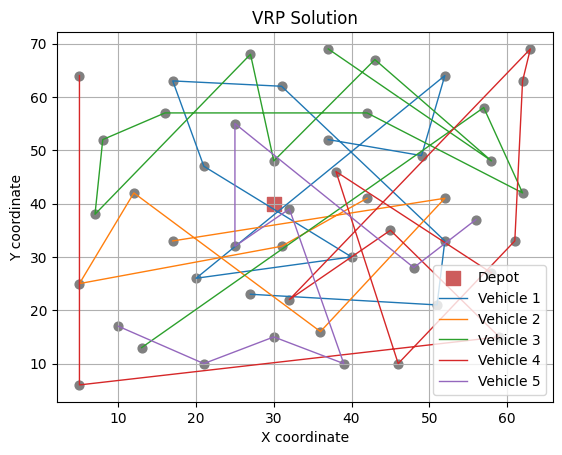

Best solution: [[10, 15, 8, 49, 20, 28, 19, 7, 47, 5], [13, 24, 17, 3, 4, 48, 37, 45], [18, 39, 12, 6, 25, 30, 27, 21, 1, 31, 26], [0, 2, 35, 34, 33, 29, 9, 38, 32, 44, 14], [11, 46, 16, 36, 43, 41, 40, 23, 42, 22]]
Objective function value: 690.3852437874419


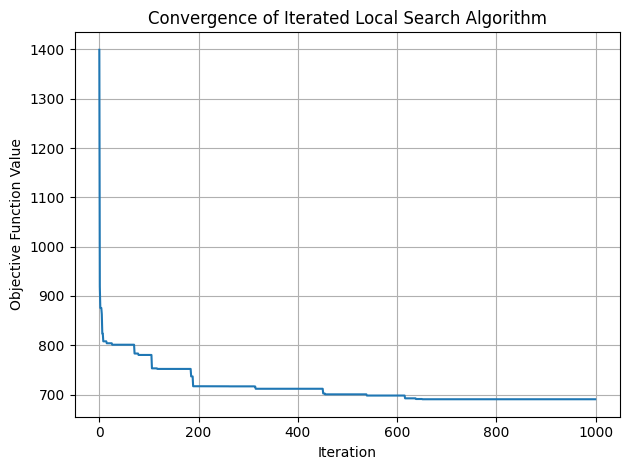

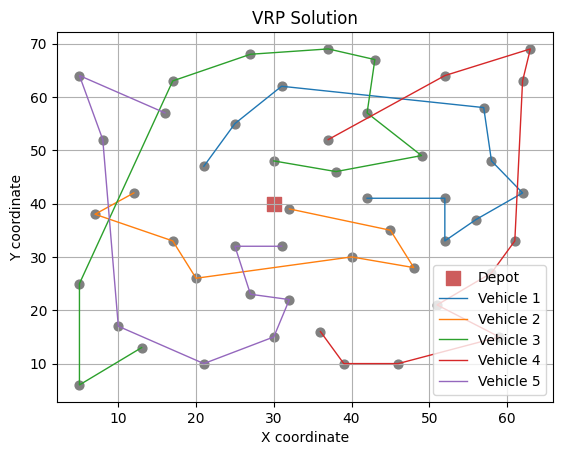

In [8]:
# Initial solution
d   = D[0]
s_o = [[] for v in V]
for i, c in enumerate(C):
    q_c = c[3]
    for j, v in enumerate(V):
        q_v = v[1]
        w   = sum(C[k][3] for k in s_o[j])
        if w + q_c <= q_v:
            s_o[j].append(i)
            break

viz(s_o)

N   = [N1, N2, N3]
X   = {"n": 100}
S   = vns(s_o, ls, N, X, n=1000, t=1e-5)
s_b = S[-1]
F   = [f(s) for s in S]

# Report outcome
print("Best solution:", s_b)
print("Objective function value:", f(s_b))

# Convergence plot
fig = plt.figure()
plt.plot(F)
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Iterated Local Search Algorithm")
plt.grid()
plt.tight_layout()
plt.show()

# Visualise the solution
viz(s_b)